# Lab Report 10b

## 3.2. Get Test Images

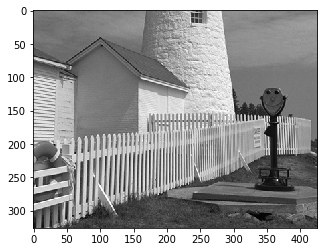

In [2]:
#a

import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np


variableName = sio.loadmat('lighthouse.mat', squeeze_me=True, struct_as_record=False)
ww = variableName['ww'] 
plt.imshow(ww, cmap='gray') 

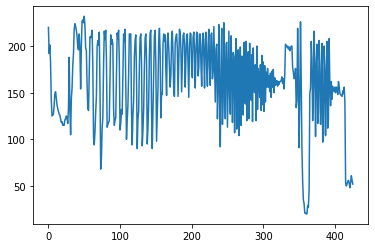

In [3]:
#b

ww200 = ww[200,:]
plt.plot(ww200)

From the plot, it can be seen that the range of the values is between 0 and 255. From the image, it can be seen that the 200th row starts and ends with the darker color, therefore most probably from the plot 0s represent black and 255s represent white color. From the plot we can say that rapid fluctuations represent the fence's color change, therefore when the fluctuations end the fence ends too, approximately at the point between 380-390 column indices.     

## 3.3 Synthesize a Test Image

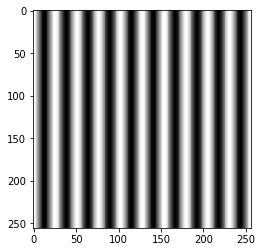

In [5]:
#a

xpix = np.ones((256,1))*np.cos(2*np.pi*np.arange(256)/25.6)
plt.imshow(xpix, cmap='gray')

The pattern looks like cosine function from upwards, where white color corresponds to the maximum absolute value of the matrix and black color is the minimum absolute value of the matrix, all other shades of white and black correspond to the absolute values of the cosine function near 1 and 0 respectively, that come one after another due to the periodicity of the cosine. Assuming that white and black bands are of the same length, from the fact that between 50 and 100 there are 3 black and 3 white bands it can be concluded that 1 band is approximately **8.3 pixels**. The length of the band can be considered as the number of pixels between two consecutive black pixels (including one of the black pixels), which corresponds to the two consecutive 0 values of the cosine function or half of the $cos(\frac{2\pi x}{16})$'s period, which is **8**.    

In [6]:
#b 

print('White represents the data value ' + '\033[1m' + str(np.max(np.abs(xpix))) + '\033[0m'
      + ' and black represents the value ' + '\033[1m' + str(np.min(np.abs(xpix))) + '\033[0m' 
      + ' (approximately' + '\033[1m' + ' 0' + '\033[0m' + ').')

White represents the data value 1.0 and black represents the value 6.189806365883577e-19 (approximately 0).


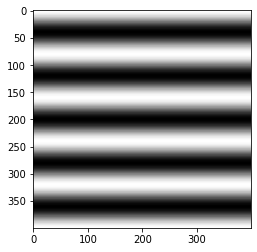

In [7]:
#c

ypix = (np.ones((400,1))*np.cos(2*np.pi*np.arange(400)/80)).T
plt.imshow(ypix, cmap='gray')

Steps needed to accomplish the task: changed the dimensions of the vectors from 256 to 400; changed the period from 8 to 80, so that the number of periods became 400/80 = 50; transposed the final matrix to produce horizontal bands. 

## 3.6 Lab Exercises: Sampling, Aliasing and Reconstruction
### 4.7.1. Down-Sampling

The shape of the two times downsampled image is (163, 213).


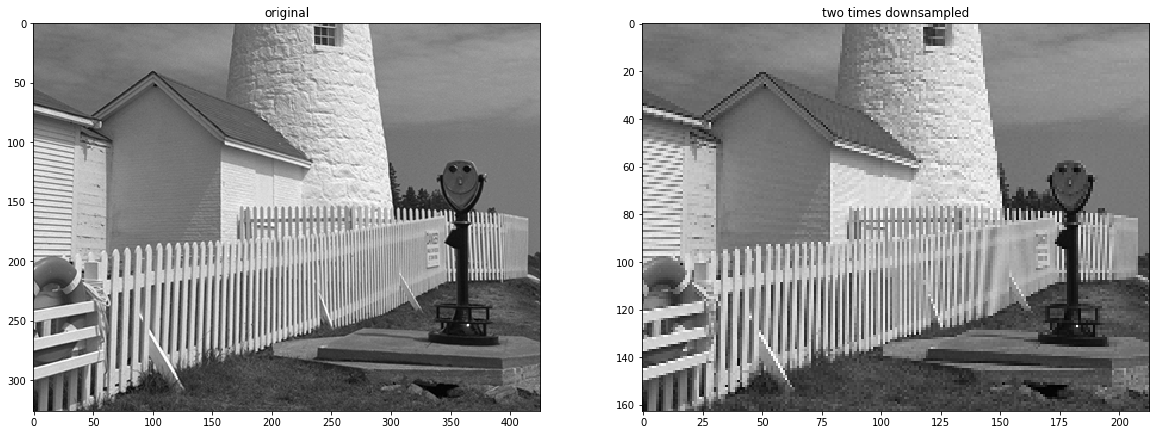

In [6]:
w2 = ww[0::2,0::2] #3.5
fig = plt.figure("Comparison", figsize= (20,20))
ax = fig.add_subplot(1,2,1)
plt.imshow(ww, cmap='gray')
#plt.axis("off")
plt.title("original")
ax = fig.add_subplot(1,2,2)
plt.imshow(w2, cmap='gray')
#plt.axis("off")
plt.title("two times downsampled")

print('The shape of the two times downsampled image is ' + str(np.shape(w2)) + '.')

### (a)
As I have already stated at the lab report 4:
"The aliasing can be seen clearly from the fact that, although the second image contains two times less information than the first image, they look pretty much similar. Because both images contain the same group of points, which in signal terms corresponds to the identical discrete-time sequence of points. The parts of the images with the rapid color change (from white to black) show the aliasing effects most dramatically. To be specific if take a closer look at the part, where the distance between two separate fence posts becomes too small, it can be seen that in the downsampled image some of the fence posts merged, which is the consequence of the aliasing effect. In other words, even though the frequency of the black spots between the posts changed, there exists a number of white and black points that are contained in both images and make the second image look similar to the first, which makes the frequencies in both images aliases".

### (b)
To estimates the frequencies zoomed plots of the original pictures 199th row and the downsampled pictures 99th row were taken. Similar to the Sampling Theorem, almost the largest frequencies from the pictures were taken. From the figure below:
$$f_{downsampled} = \frac{1}{35-29} = 0.1(6) \ (cycles/pixel)$$
$$f_{original} = \frac{1}{71-61} = 0.1 \ (cycles/pixel)$$

Sampling them with $f_s = 0.01$:
$$w_1 = 2\pi\times \frac{0.17}{0.01}= 34\pi$$ 
$$w_2 = 2\pi\times \frac{0.1}{0.01}= 20\pi$$
$$w_1 = w_2 + 14\pi \rightarrow alias!$$

Text(35, 203, '(35, 203)')

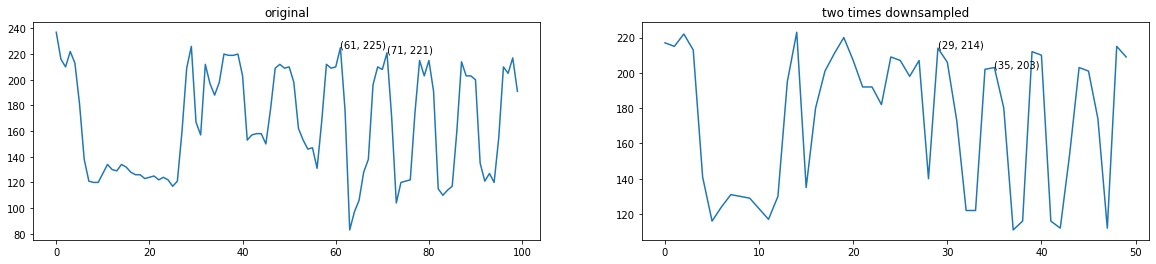

In [209]:
ww200 = ww[199,:]
w2100 = w2[99,:]


fig = plt.figure("Comparison", figsize= (20,4))
ax = fig.add_subplot(1,2,1)
plt.plot(ww200[:100])
plt.title("original")
plt.text(61, ww[199][61], '({}, {})'.format(61, ww[199][61]))
plt.text(71, ww[199][71], '({}, {})'.format(71, ww[199][71]))
ax = fig.add_subplot(1,2,2)
plt.plot(w2100[:50])
plt.title("two times downsampled")
plt.text(29, w2[99][29], '({}, {})'.format(29, w2[99][29]))
plt.text(35, w2[99][35], '({}, {})'.format(35, w2[99][35]))

### 4.7.2 Reconstruction of Images 

Text(0.5, 1.0, 'interpolated')

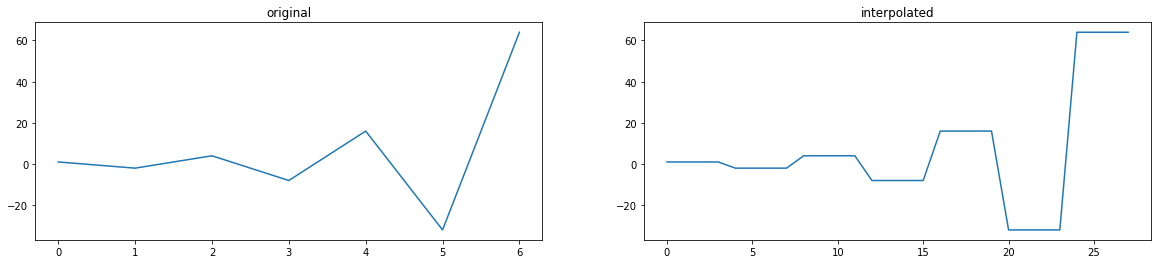

In [208]:
xx = ww
xx3 = xx[0::3,0::3] 

#a

xr1 = (-2)**np.arange(7)
L = len(xr1);
nn = np.ceil(np.arange(1,4*L+1)/4)
xr1hold = np.zeros(np.shape(nn))
for i in range(len(nn)):
    xr1hold[i] = xr1[int(nn[i])-1]
fig = plt.figure("Comparison", figsize= (20,4))
ax = fig.add_subplot(1,2,1)
plt.plot(xr1)
plt.title("original")
ax = fig.add_subplot(1,2,2)
plt.plot(xr1hold)
plt.title("interpolated")

In [11]:
nn

array([1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3., 4., 4., 4., 4., 5.,
       5., 5., 5., 6., 6., 6., 6., 7., 7., 7., 7.])

$nn$ contains xr1’s indices incremented by 1 and each index is repeated 4 times. Since sampling rate became 4 times faster, interpolation factor is 4. Computation:

$$Interpolation \ factor = \frac{output \ sampling \ rate}{input \ sampling \ rate} = \frac{28}{7} = 4$$

Text(0.5, 1.0, 'row interpolated')

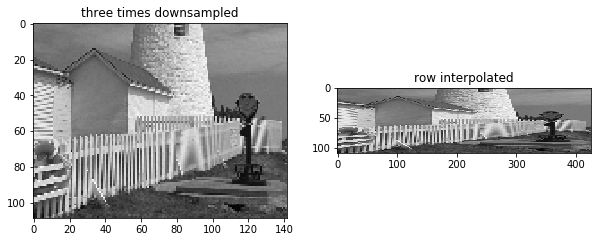

<Figure size 432x288 with 0 Axes>

In [105]:
#b

L = len(xx3.T)
nn = np.ceil(np.arange(1,3*L+1)/3)
xholdrows = np.zeros((len(xx3), len(nn)))
for i in range(len(nn)):
    xholdrows[:,i] = xx3[:,int(nn[i])-1]

fig = plt.figure(figsize = (10,20))
ax1 = fig.add_subplot(1,2,1)
fig1 = plt.figure()
ax1.imshow(xx3, cmap='gray')
#ax1.axis("off")
ax1.set_title("three times downsampled")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(xholdrows, cmap='gray')
#ax2.axis("off")
ax2.set_title("row interpolated")

# I could not fix the sizes of the images (imshow resizes it by itself), but the dimensions in terms of pixels are shown 

"From the comparison of both images, it can be seen that height (number of rows) of the xholdrows remained the same, but its width (number of columns) returned to the original size. Objects in the image became wider and the intervals between fence posts became more visible, but not clearer. The difference can be seen in the parts where the color changes rapidly (fence
posts, window), but almost the same in the parts where the color remains almost the same (background, side of the house)" (from the lab report 4).

Text(0.5, 1.0, 'interpolated')

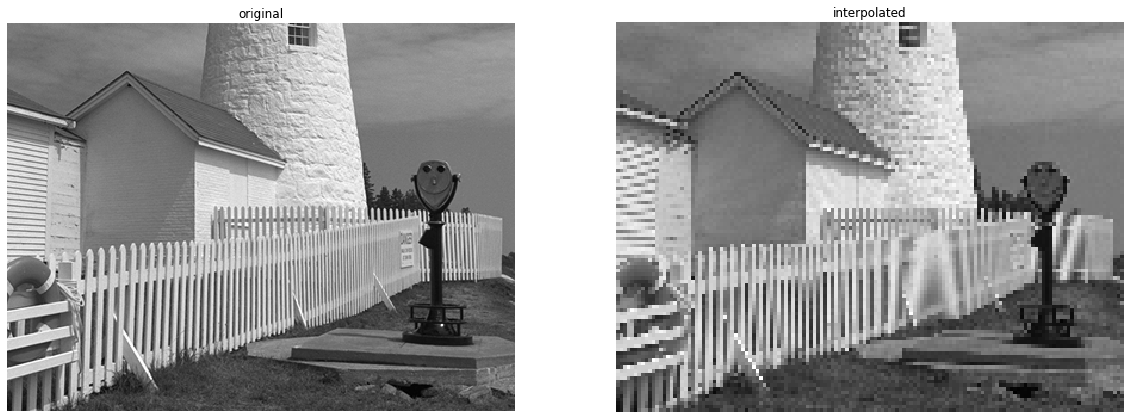

In [202]:
#c

L = len(xholdrows)
nn = np.ceil(np.arange(1,3*L+1)/3)
xhold = np.zeros((len(nn), len(xholdrows.T)))
for i in range(len(nn)):
    xhold[i,:] = xholdrows[int(nn[i])-1,:]

fig = plt.figure(figsize = (20,20))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(xx, cmap='gray')
ax1.axis("off")
ax1.set_title("original")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(xhold, cmap='gray')
ax2.axis("off")
ax2.set_title("interpolated")

"One obvious thing is that the sizes of both images are the same (+1 or -1 pixel difference). The quality of the image dropped, but the main objects can be seen. The parts of the image that did not have rapid color change (low frequency) such as the background and the ground did not change a lot and in these parts, the differences between the images are not obvious. However, in the parts where there is a rapid color change (high frequency) such as the fence, there can be seen clear distortions (black parts became white and vice versa)" (from the lab report 4).

In [120]:
#d

n1 = np.arange(7)
xr1 = (-2)**n1
tti = np.arange(0, 6.1, 0.1) 
xr1linear = np.interp(tti,n1,xr1)

$$Interpolation \ factor = \frac{output \ sampling \ rate \ (size \ of \ tti)}{input \ sampling \ rate \ (size \ of \ n1)} = \frac{61}{7} = 8.7$$

or if we do not include the first or the last terms, it is equal to $\frac{60}{6}=10$ 

Text(0.5, 1.0, 'linearly interpolated')

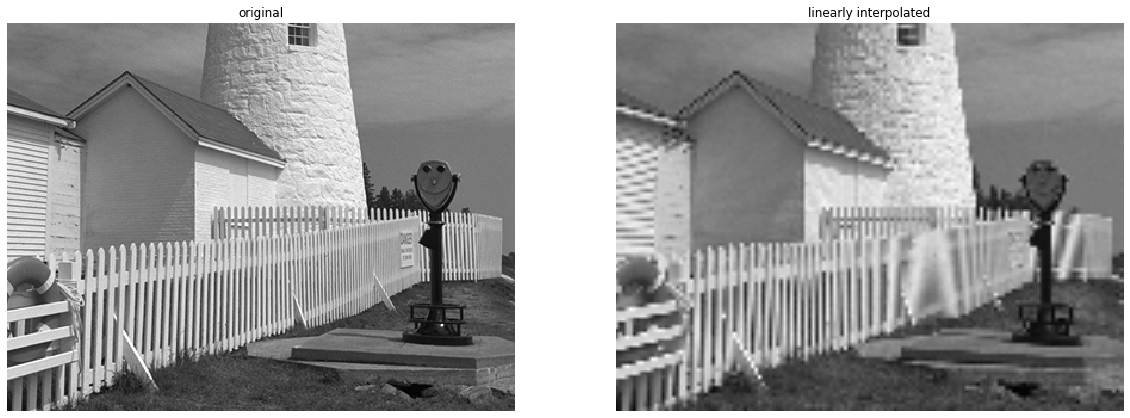

In [201]:
#e 

n1 = np.arange(len(xx3.T))
tti = np.arange(0, n1[-1]+1, 1/3) 
xxlinearrows = np.zeros((len(xx3), len(tti)))
for i in range(len(xx3)):
    xxlinearrows[i] = np.interp(tti,n1,xx3[i])
    
n2 = np.arange(len(xx3))
tti2 = np.arange(0, n2[-1]+1/2, 1/3)
xxlinear = np.zeros((len(tti2), len(tti)))
for i in range(len(tti)):
    xxlinear.T[i] = np.interp(tti2,n2,xxlinearrows.T[i])

fig = plt.figure(figsize = (20,20))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(xx, cmap='gray')
ax1.axis("off")
ax1.set_title("original")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(xxlinear, cmap='gray')
ax2.axis("off")
ax2.set_title("linearly interpolated")

### (f)
"The linearly “reconstructed” image looks blurred, compared to this the original image (obviously) is more detailed, but still the main objects can be easily differentiated. The parts that are made of the different shades of the same color look almost identical, but the parts that include both white and black colors look different. The reconstruction process most probably will remove the aliasing effects, because there still be the sequence of points that will be included in both images and because reconstruction does not remove these points unless it removes principal alias" (from the lab report 4).

Text(0.5, 1.0, 'linear interpolation')

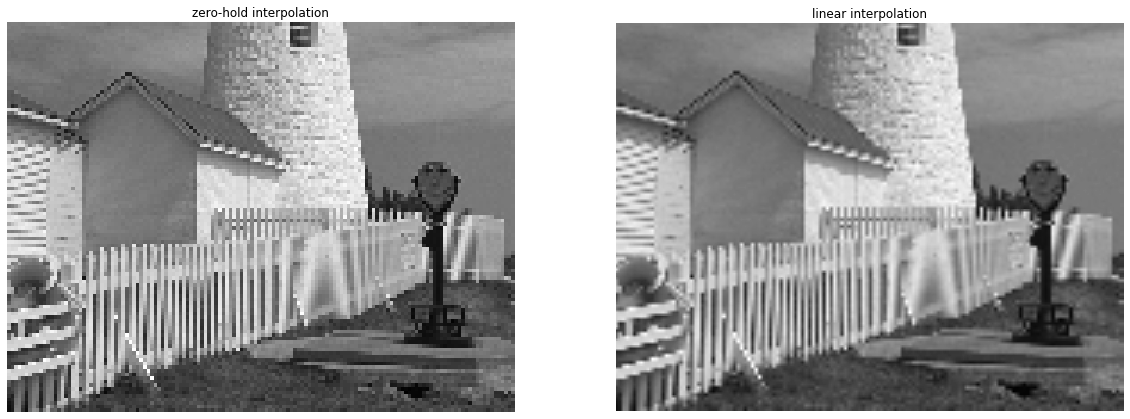

In [200]:
# g

fig = plt.figure(figsize = (20,20))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(xhold, cmap='gray')
ax1.axis("off")
ax1.set_title("zero-hold interpolation")
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(xxlinear, cmap='gray')
ax2.axis("off")
ax2.set_title("linear interpolation")

The linearly interpolated image looks more blurred than the zero-order hold result, especially in the parts where there is a rapid color change. Probably, it is because the rate of change of the linear case is more rapid and, as it can be seen from the plots below, the zero-order is smoother than the linear interpolation, which means the derivative of the linear's graph remains unchanged more compared to the zero-order, therefore it looks like the linear one lost more data in the image (although it is not true).     

"Below are the fence parts of both interpolations. “High-frequency” parts such as the sequence of the fence posts differ more than “low-frequency” parts such as the parts with black binoculars (or background). It can be seen from the fact that the differences between the Y values of the same X values in the “high-frequency” parts (e.g. 213 vs 210) are larger than the differences between the Y values of the same X values in the “low-frequency” parts (e.g. 220 vs 219)" (from the lab report 4). In other words, the differences between the number of ups and downs in "high-frequency" areas (left and central side of the plot) are more noticable than in "low-frequency" areas (righ side of the plot). 

Text(0.5, 1.0, 'linear interpolation')

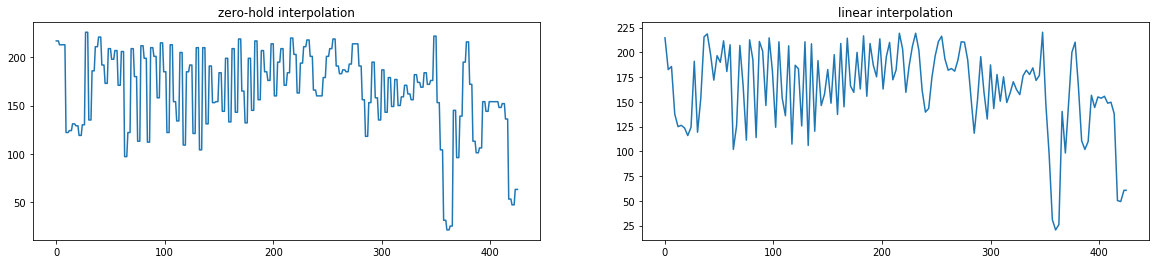

In [205]:
ww200 = xhold[199,:]
w2100 = xxlinear[199,:]


fig = plt.figure("Comparison", figsize= (20,4))
ax = fig.add_subplot(1,2,1)
plt.plot(ww200)
plt.title("zero-hold interpolation")
ax = fig.add_subplot(1,2,2)
plt.plot(w2100)
plt.title("linear interpolation")

### 4.8 More about Images in Python
### Image threshold

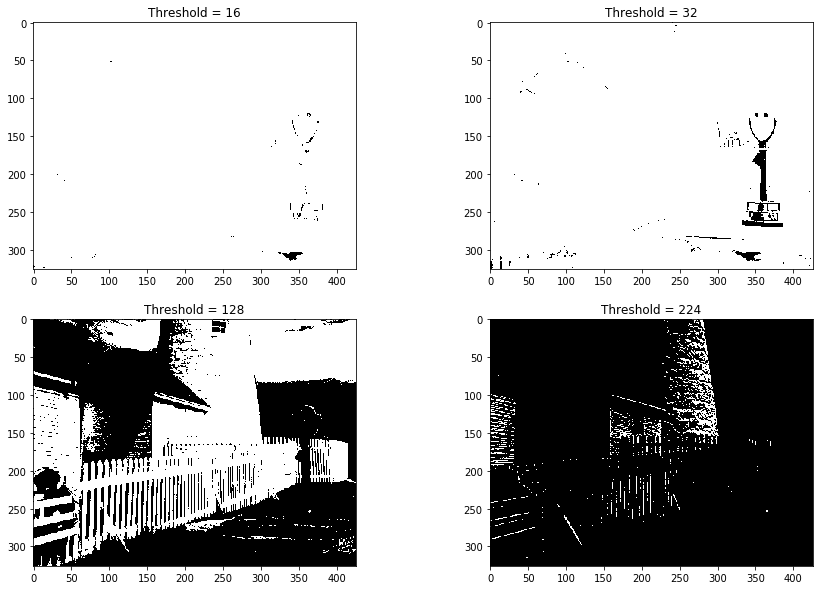

In [207]:
def threshold(im, threshold):
    return ((im>threshold)*255).astype("uint8")

f, axarr = plt.subplots(2,2)
j = 0
k = 0
for i in [16, 32, 128, 224]:
    if (i>32):
        k = 1 
    axarr[k,j%2].imshow(threshold(xx, i), cmap='gray')
    axarr[k,j%2].set_title("Threshold = " + str(i))
    
    j = j + 1
    
f.set_size_inches(15, 10)

From the image comparison above, it can be seen that the function changes the level of brightness of the image. As we increase the threshold the image becomes darker. It varies from very bright to very dark and there is a mathematical explanation for these results. For the small values of the threshold (im>threshold) returns 1 for almost all the values in the image's matrix and transforming it to the matrix with a lot of 255 values which corresponds to white color, but as we increase threshold (im>threshold) starts to return 0 for more and more values and transforming the matrix to one with a lot of 0 values which corresponds to black color.    